In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
import importlib


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/'
stispath = '{}stis/'.format(path)
cospath = '{}cos/'.format(path)

In [3]:
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))#, glob.glob('{}*x1dsum.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05030_sx1.fits'],
      dtype='<U65')

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05010_x1d.fits
G140M
[168.32626]


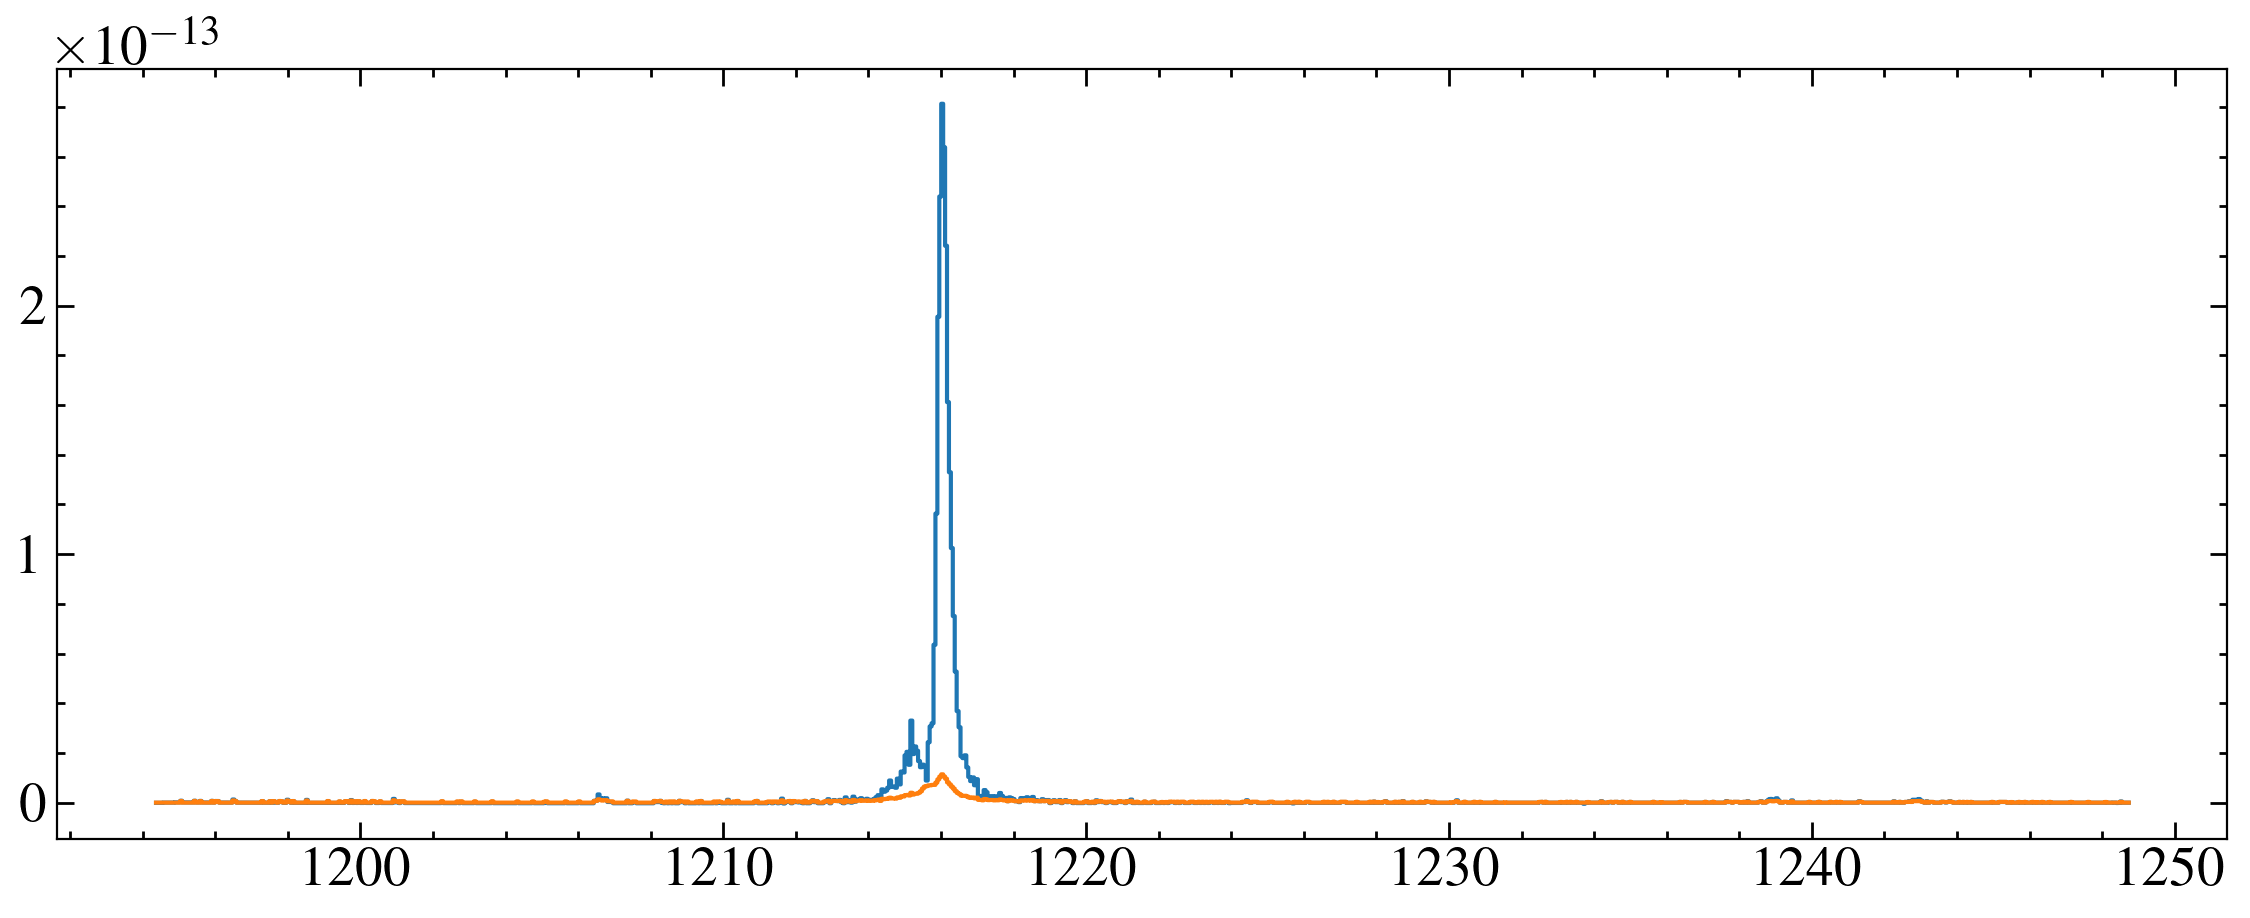

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05020_x1d.fits
G230L
[527.6192]


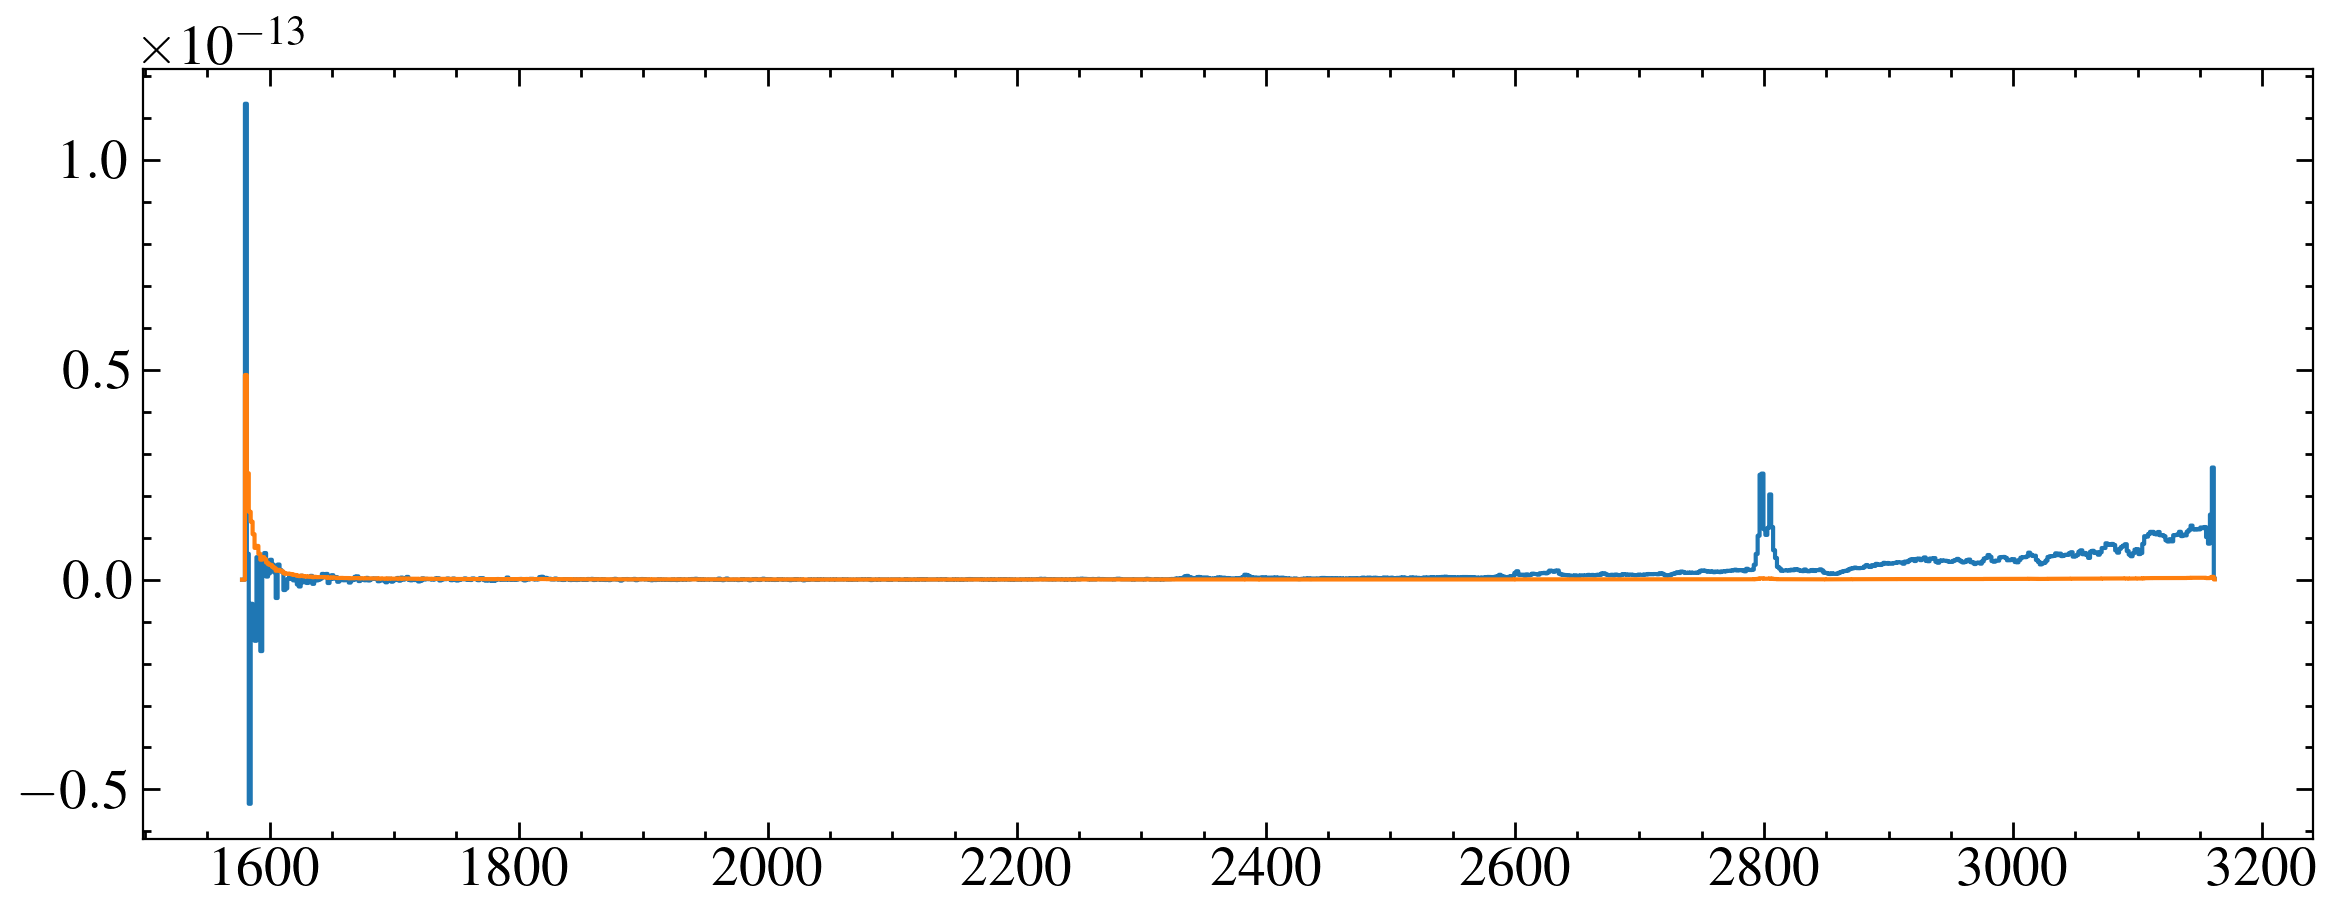

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05030_sx1.fits
G430L
[894.6254]


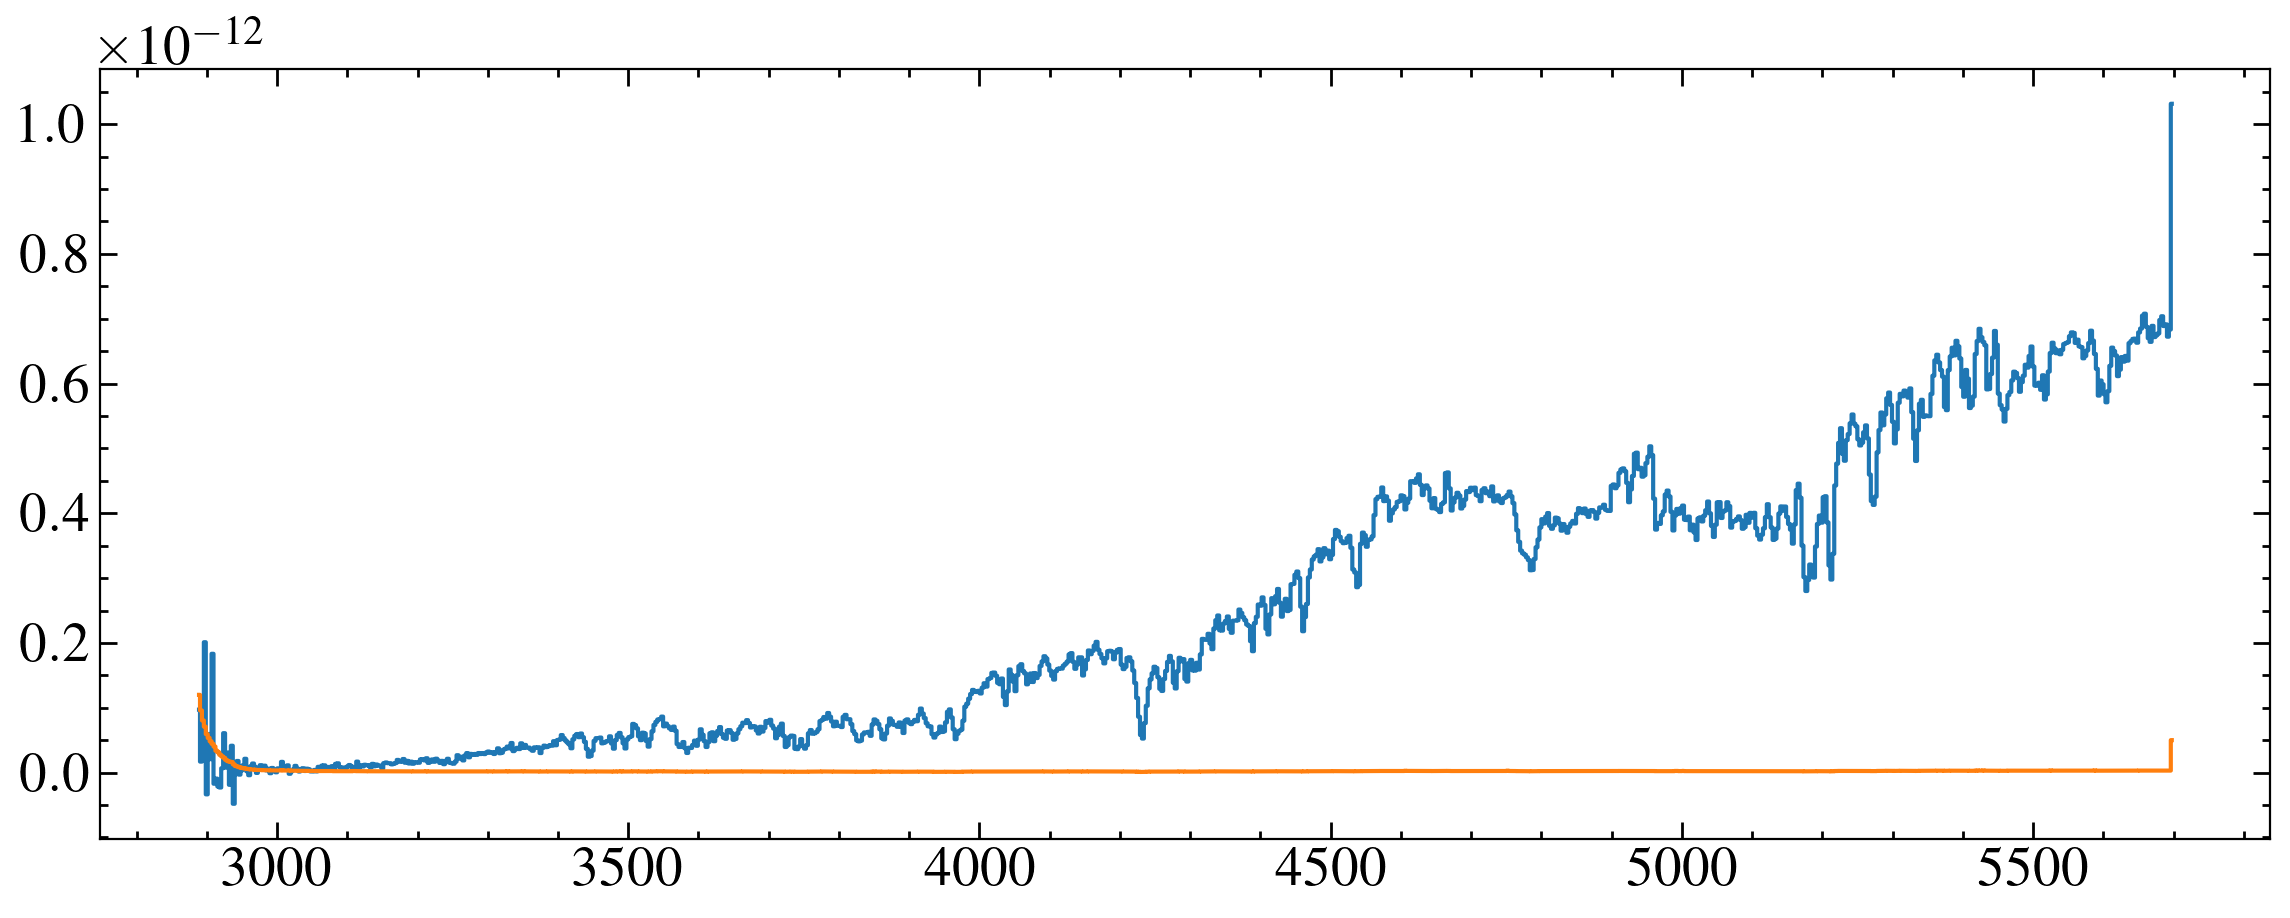

In [4]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()

    

In [5]:
x1dsums = glob.glob('{}*x1dsum.fits'.format(path))
x1dsums

['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


(-1e-15, 1e-14)

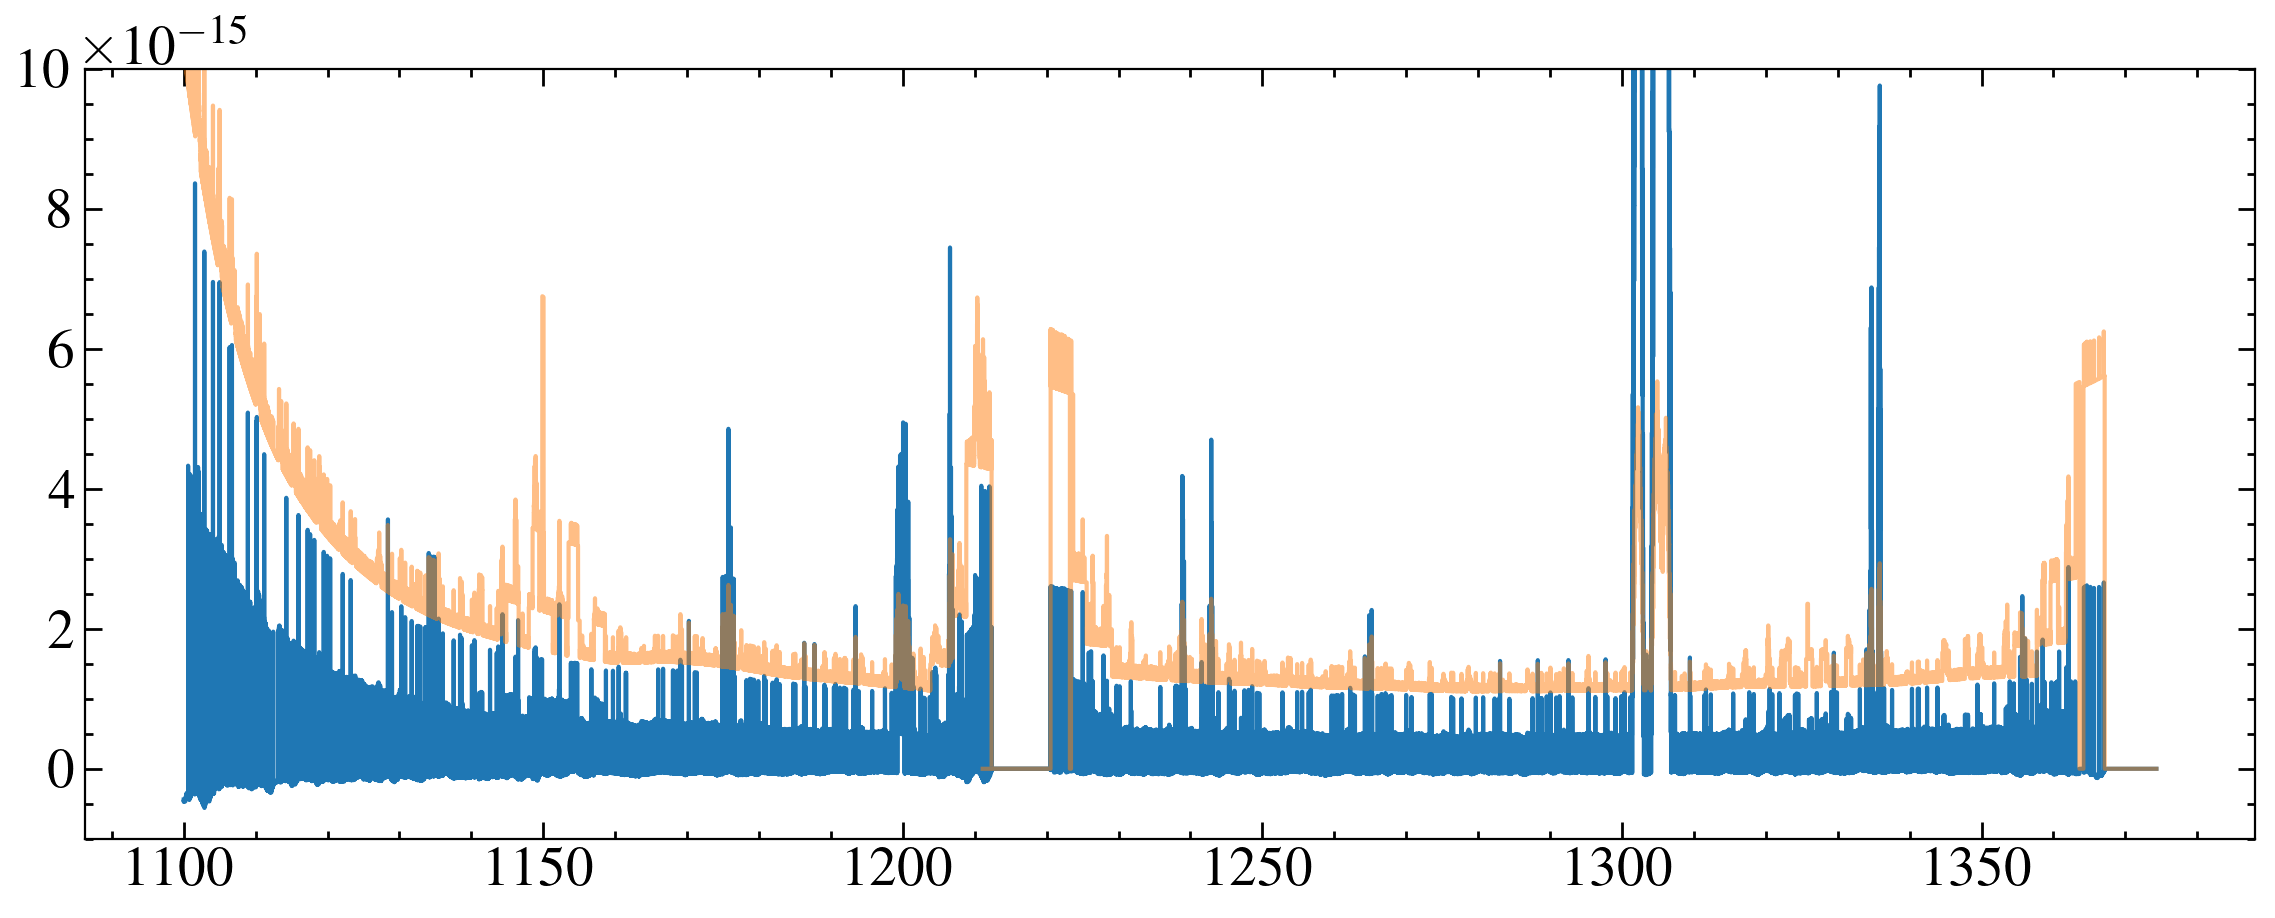

In [6]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1', alpha=0.5)
plt.ylim(-1e-15, 1e-14)
    

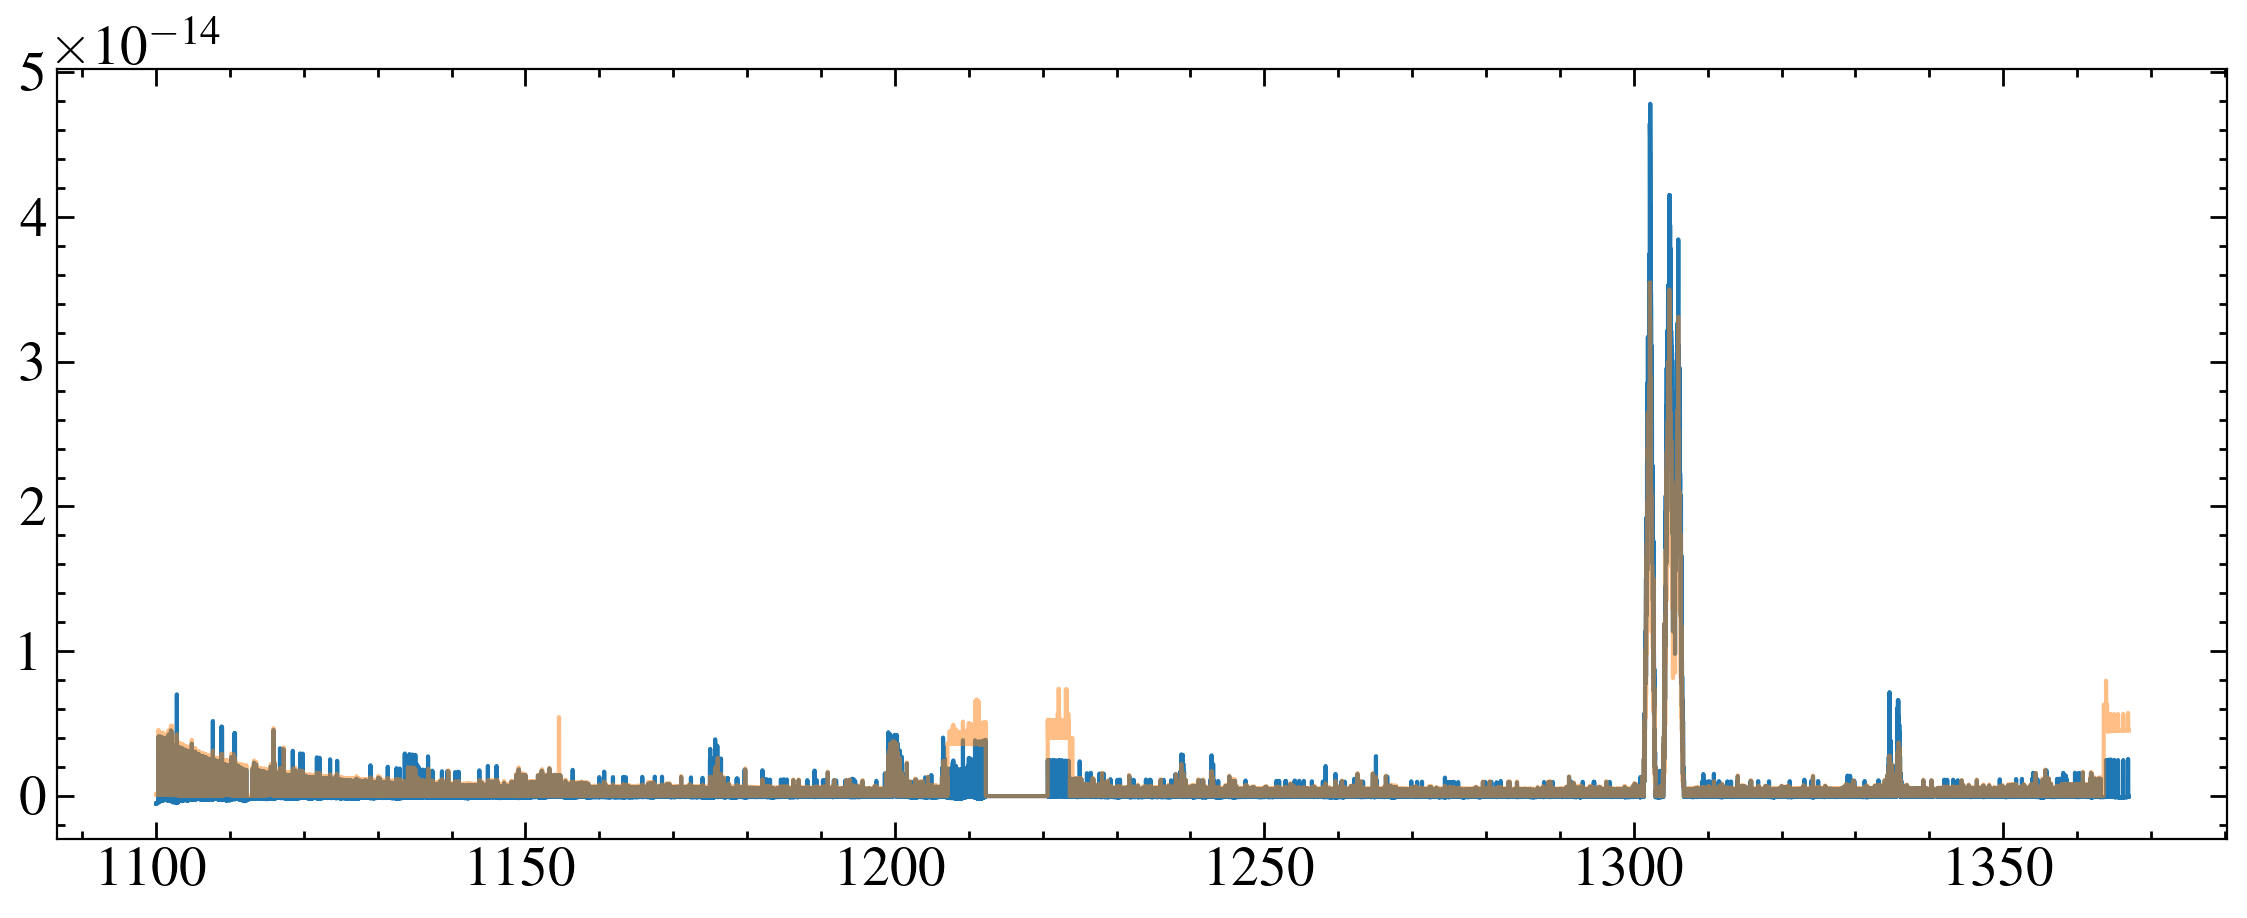

In [7]:
kw, kf, ke = np.loadtxt('cos_files/gj341/GJ341_G130M_mMEATS_Mm1_NOSCL_24jan2024.sav.txt', unpack = True, skiprows=2)
mask = kw > 1100
kw, kf, ke = kw[mask], kf[mask], ke[mask]
plt.step(kw, kf, where='mid', c='C0')
plt.step(kw, ke, where='mid', c='C1', alpha=0.5)

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


/tmp/ipykernel_30225/1903304160.py:9: RuntimeWarning: invalid value encountered in divide
  plt.step(w, f/e, where='mid', c='C0', alpha =0.5)
/tmp/ipykernel_30225/1903304160.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(kw, kf/ke, c='C1', alpha=0.5)


(0.0, 10.0)

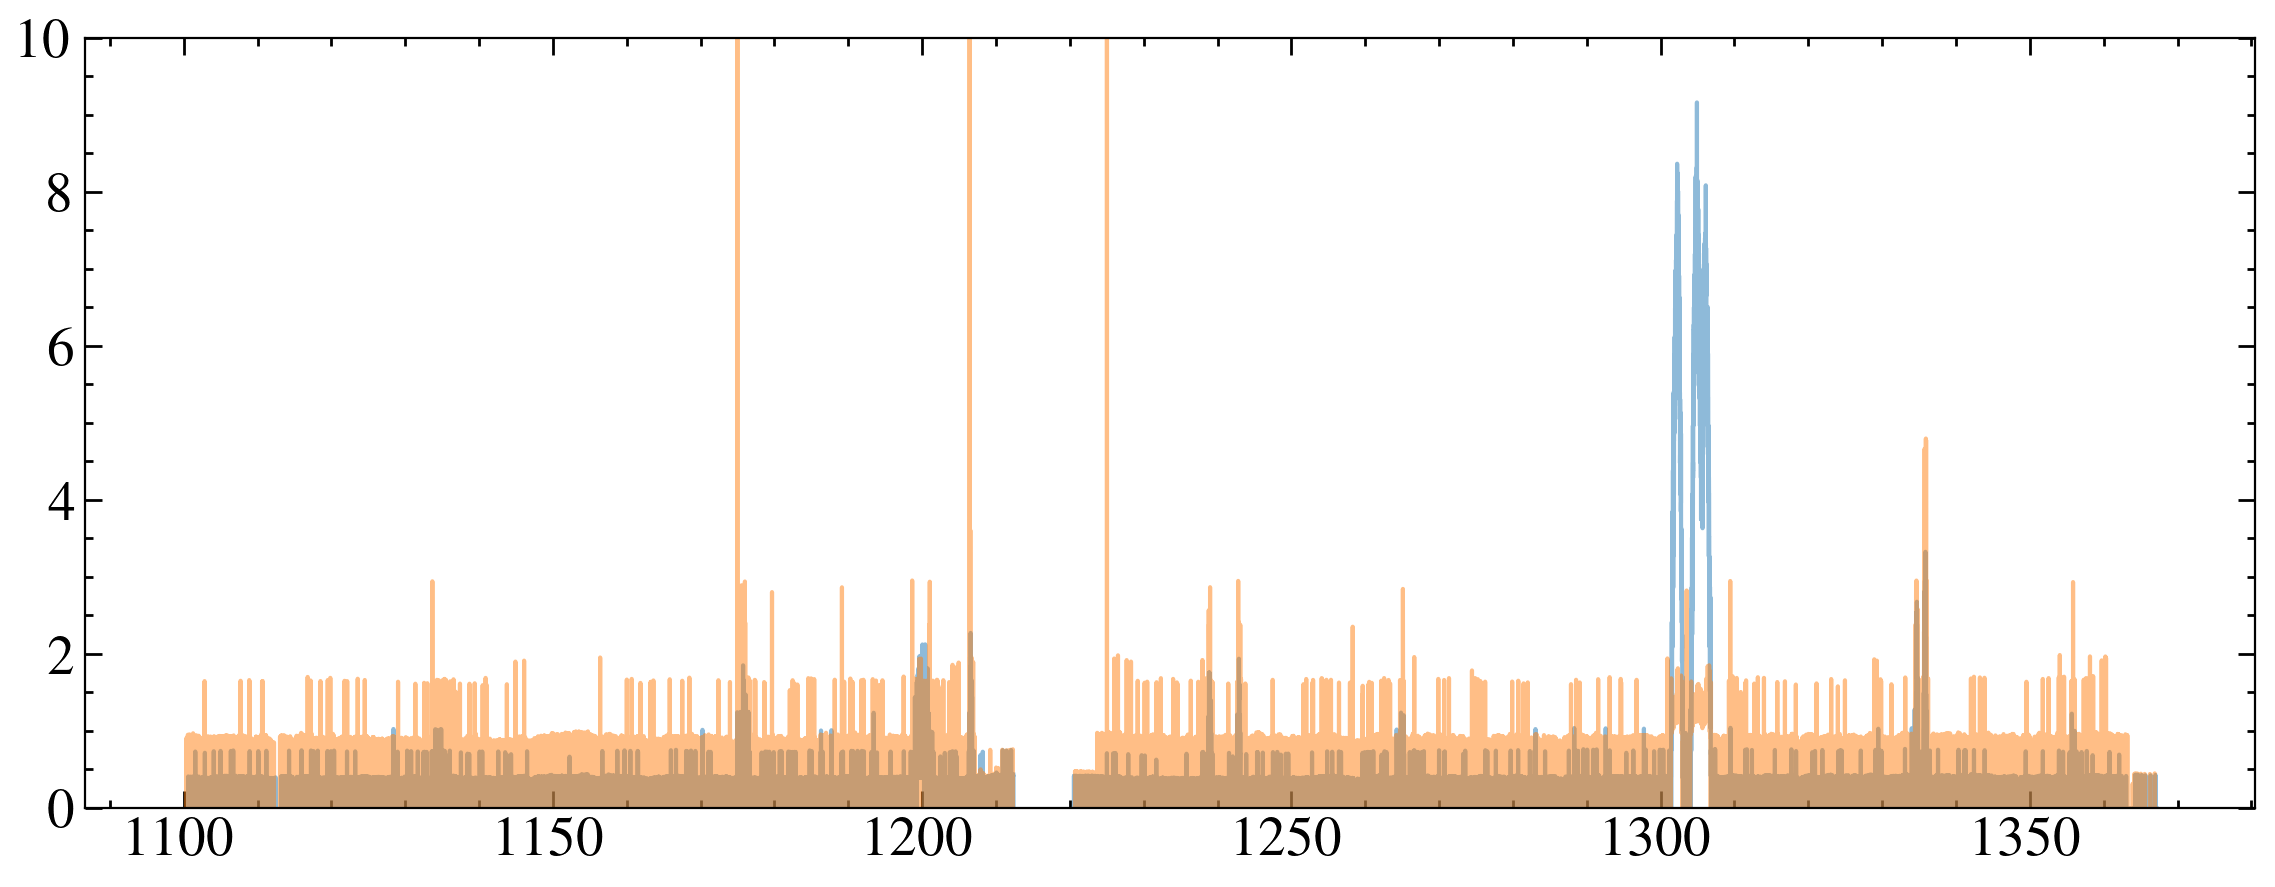

In [8]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f/e, where='mid', c='C0', alpha =0.5)
    plt.plot(kw, kf/ke, c='C1', alpha=0.5)
plt.ylim(0, 10)
# plt.ylim(-1e-15, 1e-14)

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


(1235.0, 1245.0)

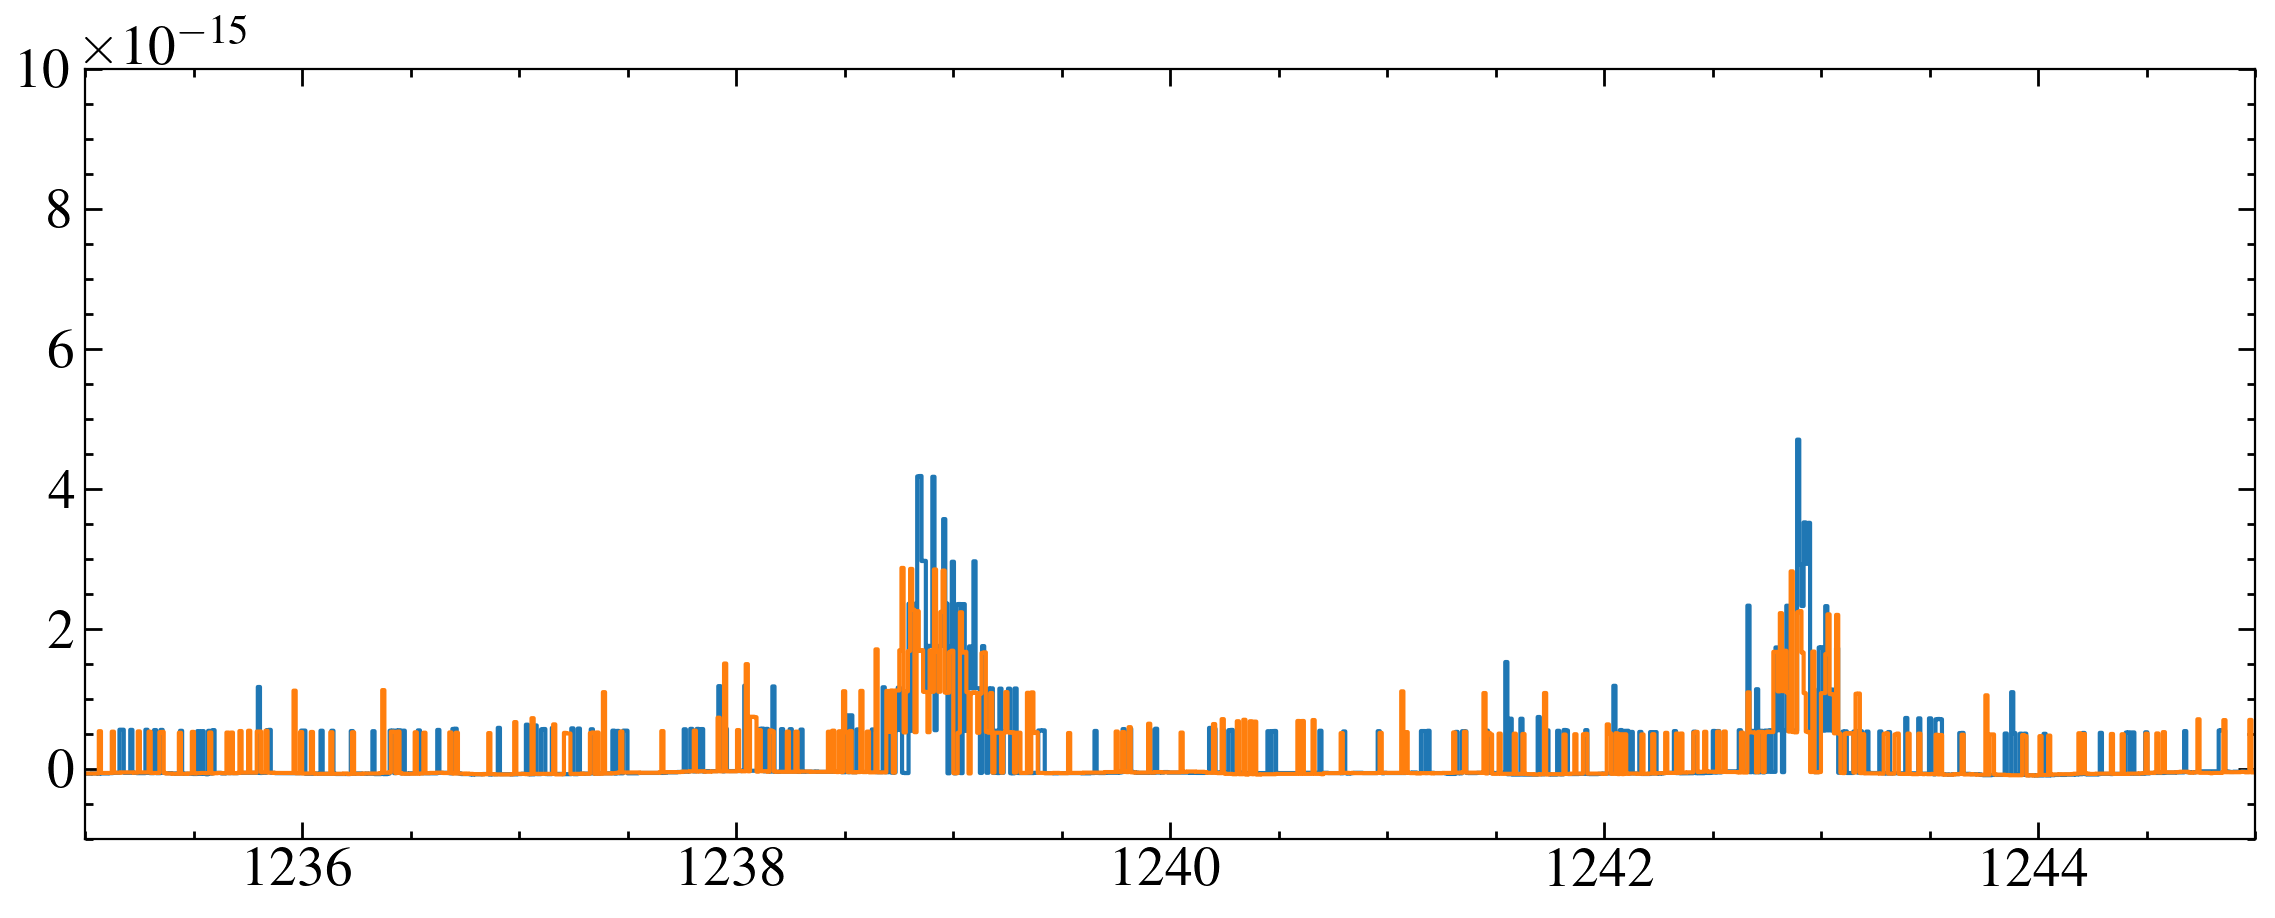

In [9]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1', alpha=0.5)
plt.ylim(-1e-15, 1e-14)
plt.step(kw, kf, where='mid', c='C1')
plt.xlim(1235, 1245)
    

I guess it's pretty terrible either way

30291 30291 30291 30291
['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']


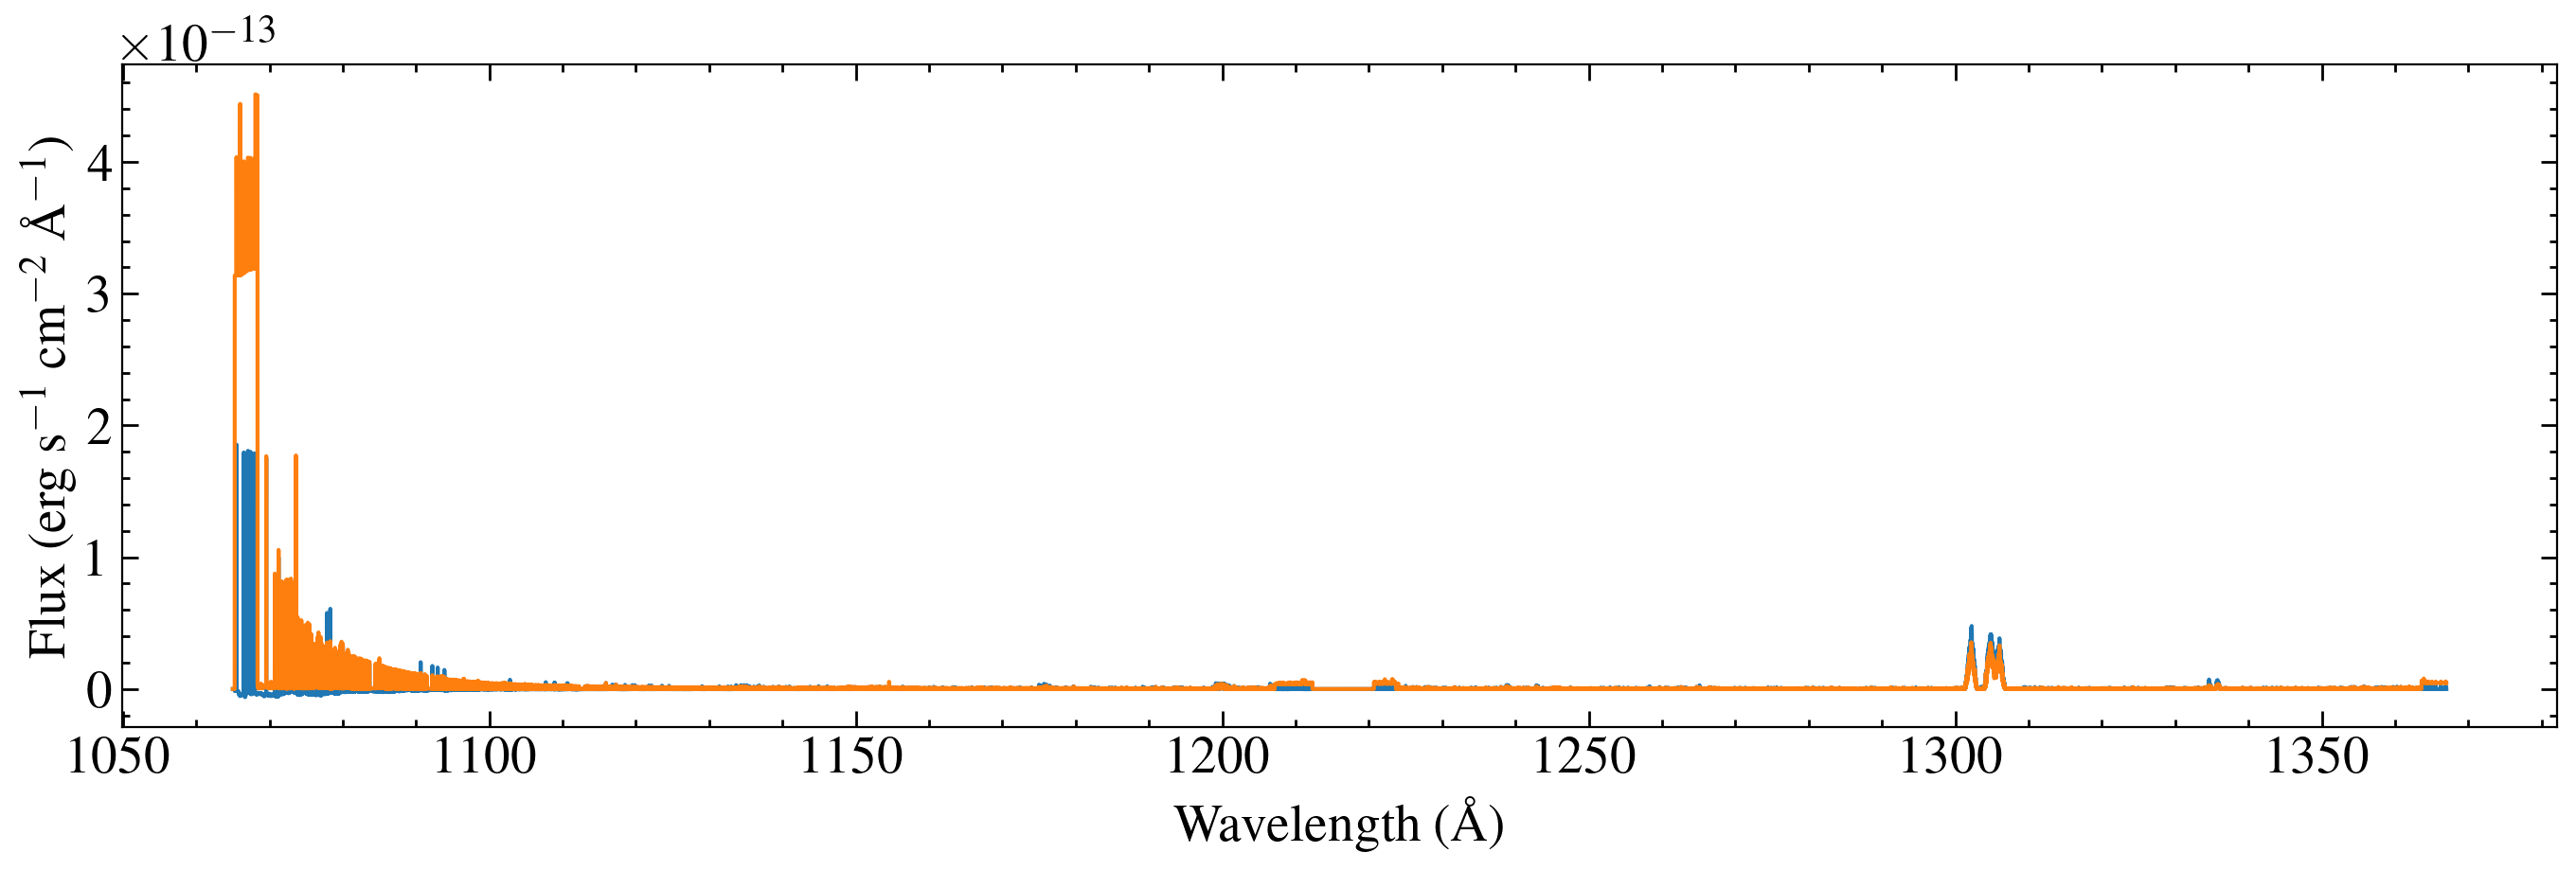

Spectrum saved as hlsp_muscles_hst_cos_gj_341_g130m_v1_component-spec.fits


In [10]:
import prepare_cos
importlib.reload(prepare_cos)

savpath = 'cos_files/gj341/GJ341_G130M_mMEATS_Mm1_NOSCL_24jan2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/gj_341/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='GJ_341')

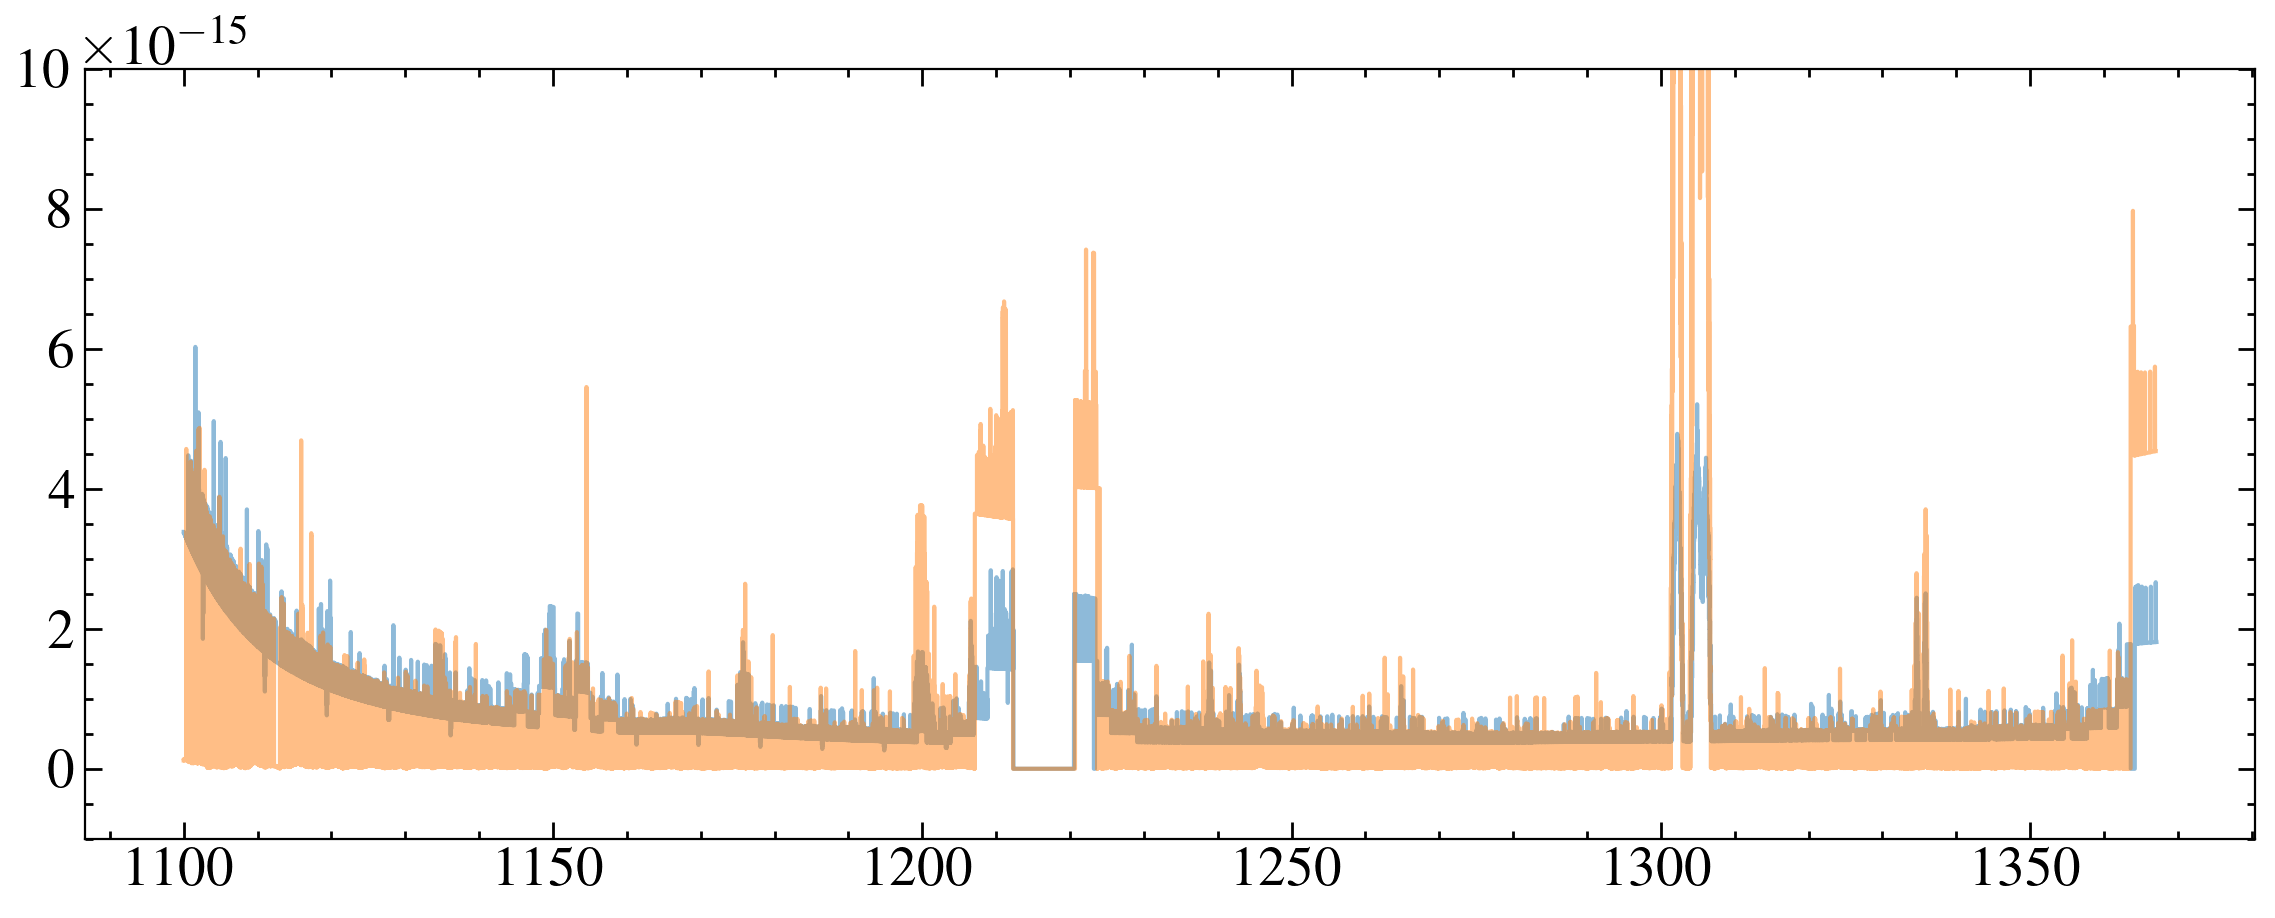

In [11]:
hasppath = '{}/hasp/hst_16701_cos-stis_hd-304636_g130m-sg230l-g430l_leoo_cspec.fits'.format(path)
hasp = fits.getdata(hasppath, 1)[0]

hw, hf, he= hasp['WAVELENGTH'], hasp['FLUX'], hasp['ERROR']
mask = (hw > 1100) & (hw < 1370)
hw, hf, he = hw[mask], hf[mask], he[mask]
# plt.step(hw, hf, where='mid')
plt.step(hw, he, where='mid', alpha=0.5)
plt.ylim(-1e-15, 1e-14)
# plt.step(kw, kf, where='mid')
plt.step(kw, ke, where='mid',alpha=0.5)

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05020_x1d.fits
G230L
[527.6192]


/tmp/ipykernel_30225/3455503918.py:12: RuntimeWarning: invalid value encountered in divide
  ax.step(w, f/e, where='mid')


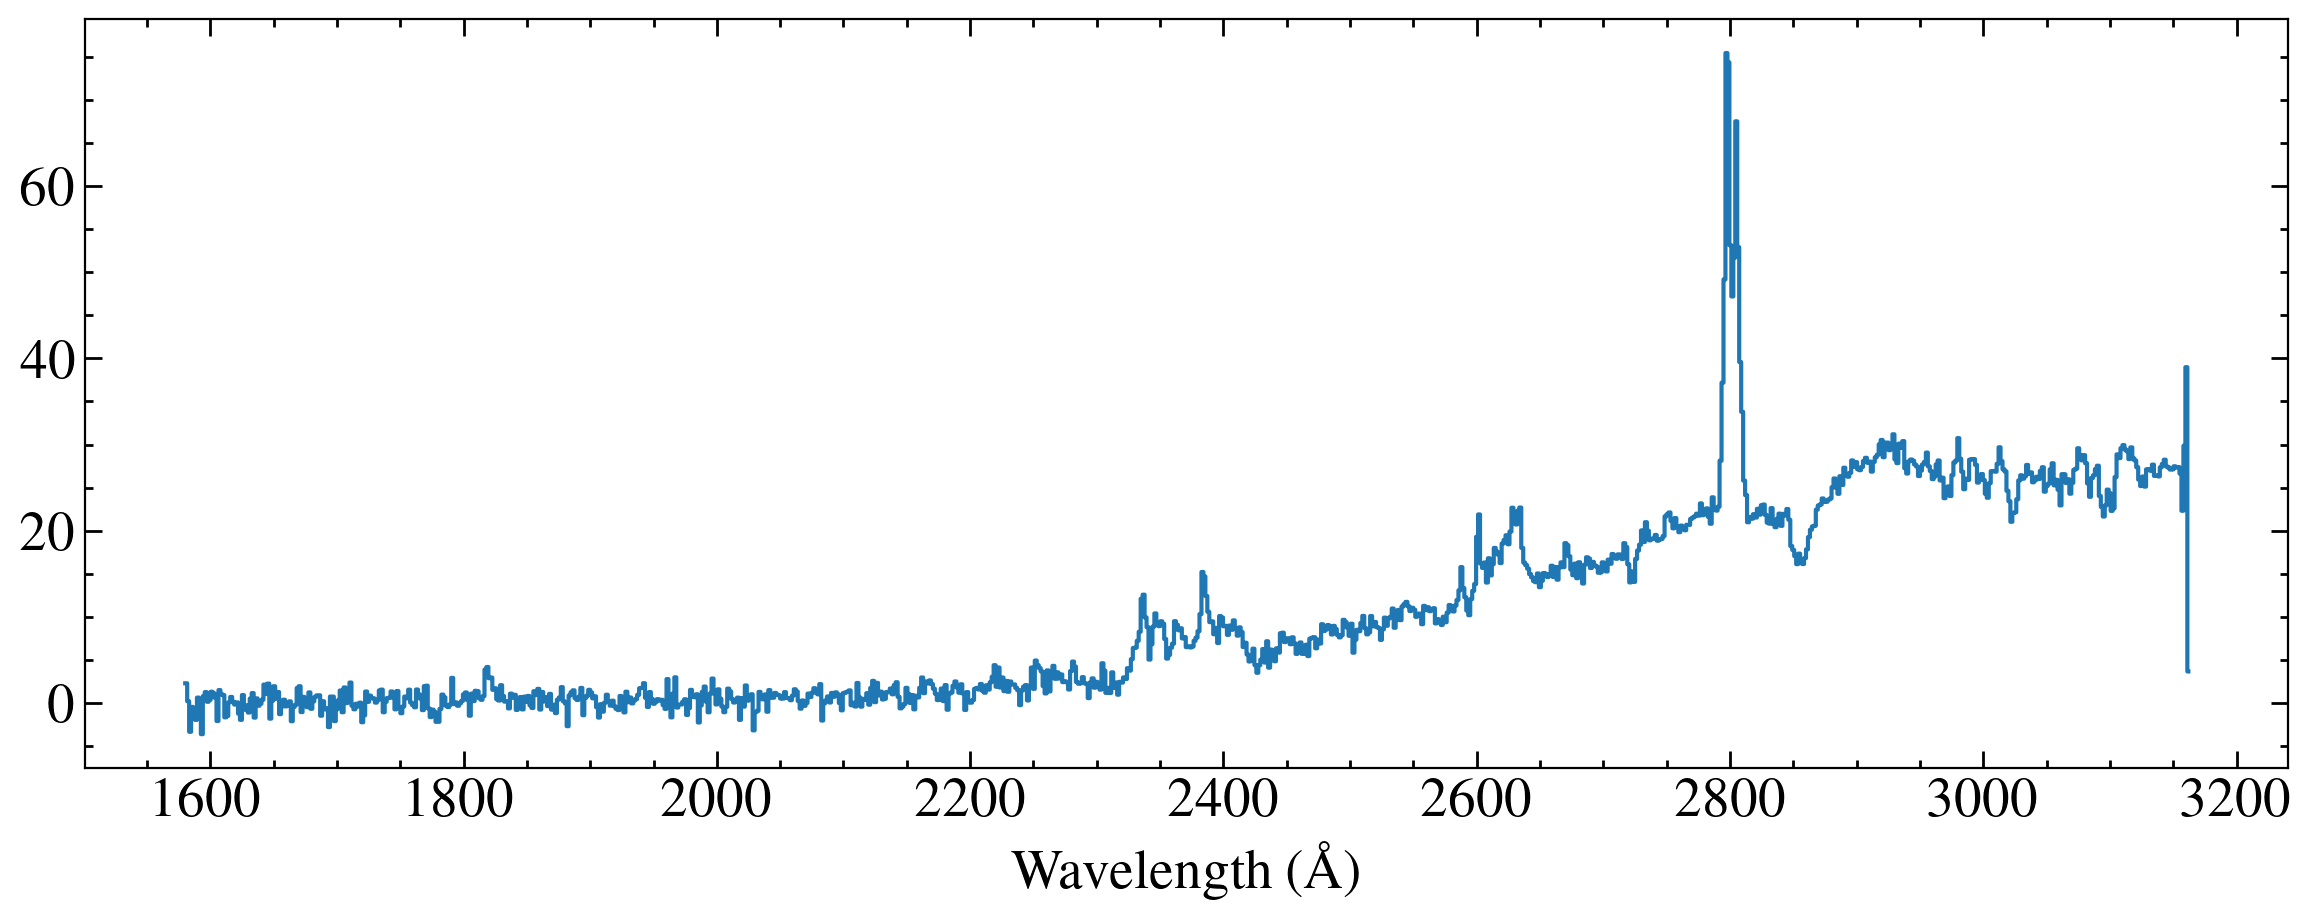

In [12]:
for x in x1ds[1:2]:
    fig, ax = plt.subplots(figsize=(12,5 ))
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    # ax.step(w, f, where='mid', c='C0', label='FLUX')
    # ax.step(w, e, where='mid', c='C1', alpha = 0.5, label='ERROR')
    ax.step(w, f/e, where='mid')
    # ax.set_yscale('log')
    ax.set_xlabel('Wavelength (\AA)')
    # ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
    # ax.legend(frameon=True, loc=2)
    # ax.set_ylim(2e-17, 2e-13)
    fig.tight_layout()
    plt.show()

    

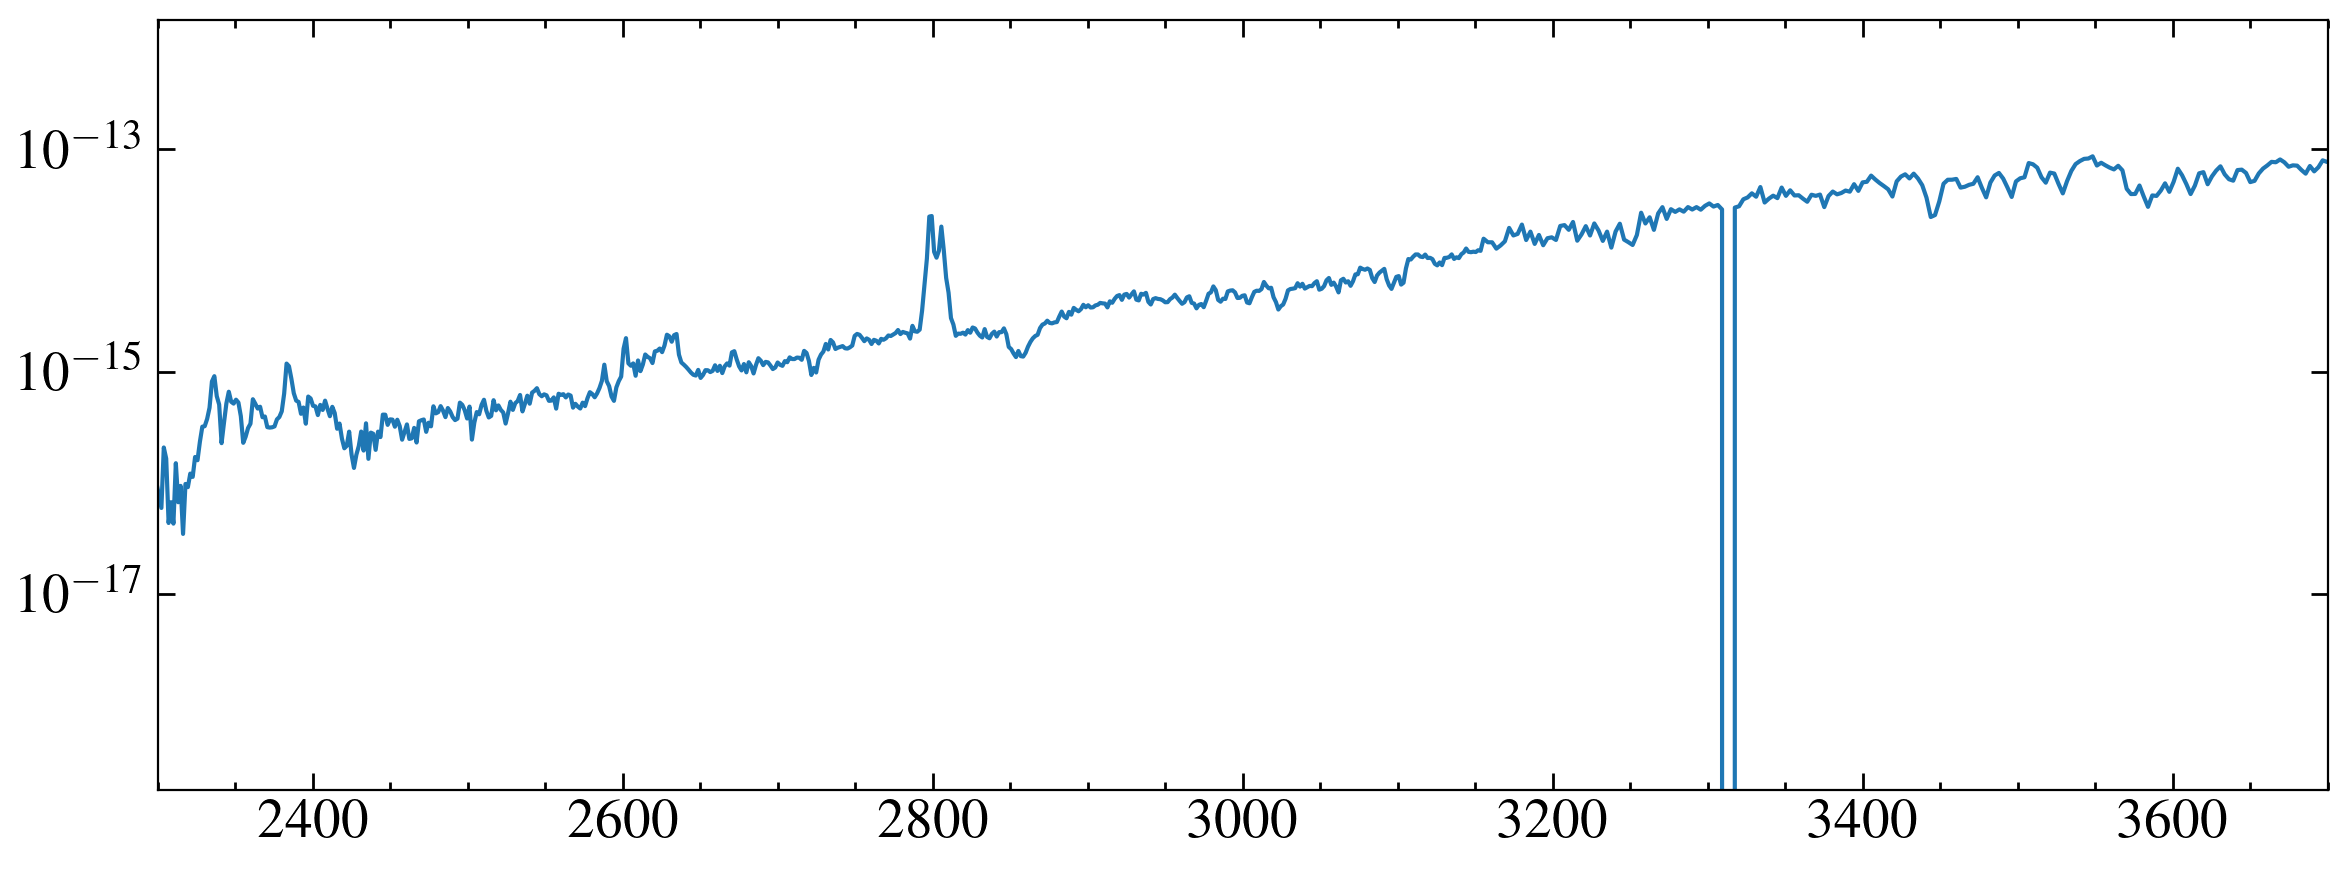

In [18]:
hasppath = '{}/hasp/hst_16701_cos-stis_hd-304636_g130m-sg230l-g430l_leoo_cspec.fits'.format(path)
hasp = fits.getdata(hasppath, 1)[0]

hw, hf, he= hasp['WAVELENGTH'], hasp['FLUX'], hasp['ERROR']

plt.plot(hw, hf)
plt.xlim(2300, 3700)
plt.yscale('log')

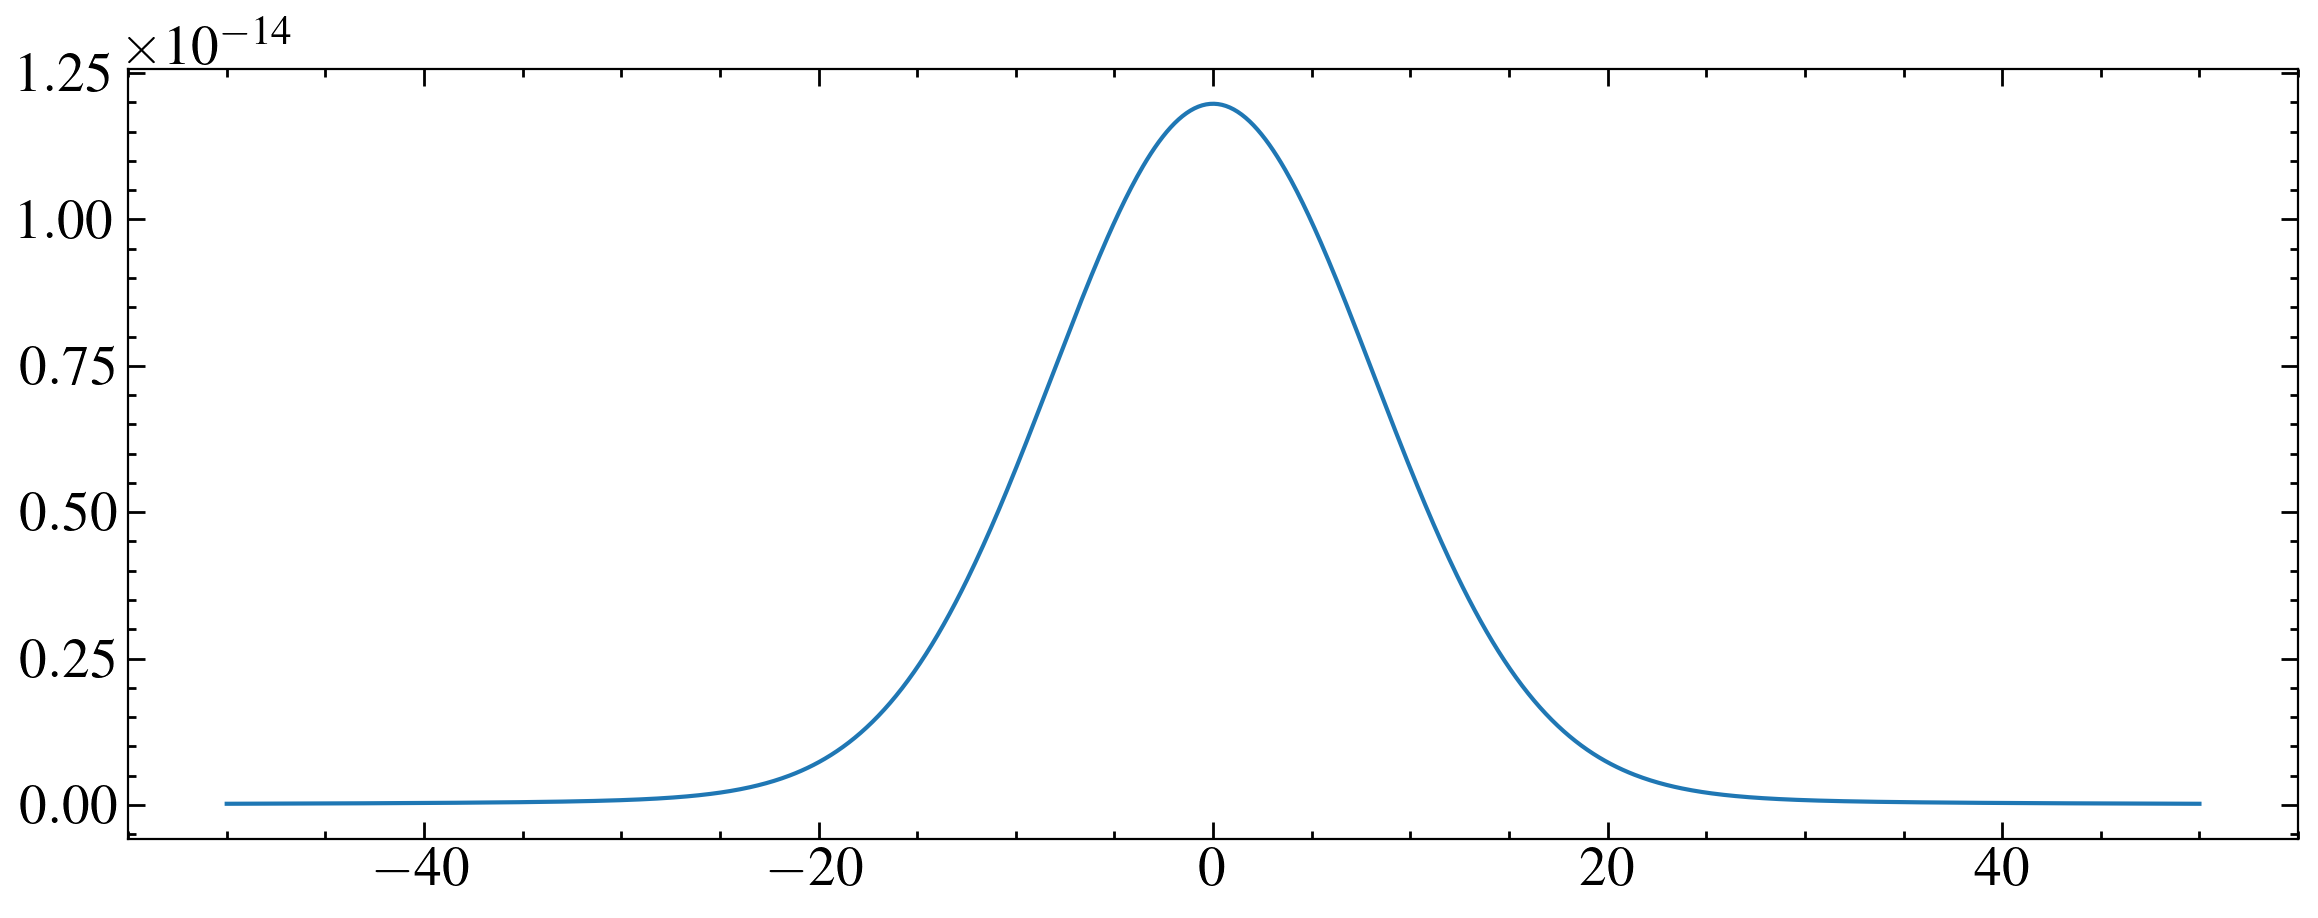

In [20]:
x = np.linspace(-50, 50, 1000)
mod = models.Voigt1D(x_0=0, amplitude_L=10**-12.86, fwhm_L=1.17, fwhm_G=18.79)
plt.plot(x, mod(x))